# Fake News Detection

This project used to use the [LIAR dataset](https://huggingface.co/datasets/ucsbnlp/liar/blob/main/liar.py). We have now moved to [LIAR2 dataset](https://huggingface.co/datasets/chengxuphd/liar2)

## Categorization:

| Label     | "pants-fire" | "false" | "barely-true" | "half-true" | "mostly-true" | "true" |
|-----------|--------------|---------|---------------|-------------|---------------|--------|
|**Point score**| -2           | -1      | -0.5          | 0           | 0.5           | +1     |
|**Int-Label**  | 0            | 1       | 2             | 3           | 4             | 5      |

## Dataset - old:

Ignore

**Useful data points:** Label, statement, subject, party_affiliation, context

**data points to discuss:** job_title, state_info, XXX_counts, 

**data points to discard:** id, speaker


### LIAR paper performance:

| Models              | Validation | Test  |
|---------------------|------------|-------|
| Majority            | 0.204      | 0.208 |
| SVMs                | 0.258      | 0.255 |
| Logistic Regression | 0.257      | 0.247 |
| Bi-LSTMs            | 0.223      | 0.233 |
| CNNs                | 0.260      | 0.270 |
| Hybrid CNNs         |            |       |
| Text + Subject      | 0.263      | 0.235 |
| Text + Speaker      | 0.277      | 0.248 |
| Text + Job          | 0.270      | 0.258 |
| Text + State        | 0.246      | 0.256 |
| Text + Party        | 0.259      | 0.248 |
| Text + Context      | 0.251      | 0.243 |
| Text + History      | 0.246      | 0.241 |
| Text + All          | 0.247      | 0.274 |

**Highest test score:** 0.274

**Post research performance:** 0.99

## Dataset - new:

**Useful data points:** Label, statement, subject, speaker_description, context

**data points to discuss:** justification, state_info, XXX_counts

**data points to discard:** id, speaker, date

## Model options:

Completed, can be ignored

### Previous Research:
- Jadhav, S. S., & Thepade, S. D. (2019). Fake News Identification and Classification Using DSSM and Improved Recurrent Neural Network Classifier. Applied Artificial Intelligence, 33(12), 1058–1068. https://doi.org/10.1080/08839514.2019.1661579
    - Achieved 99% on LIAR dataset with TF-IDF uing LSTM
- R. R. Mandical, N. Mamatha, N. Shivakumar, R. Monica and A. N. Krishna, "Identification of Fake News Using Machine Learning," 2020 IEEE International Conference on Electronics, Computing and Communication Technologies (CONECCT), Bangalore, India, 2020, pp. 1-6, doi: 10.1109/CONECCT50063.2020.9198610.
    - Achieved 99% on LIAR dataset with TF-IDF uing "passive-agrassive"
- Other options that also achieved 50%, 33% 27%

### Model to pick:
- [x] Discuss whether we will replicate these studies (we can't improve on the 99% ones though) or create our own model instead.
- What we can do with our own model:
    - Categorize professions (politician, news source, civilian etc.)
    - categorize parties (rep. dem. none lib. etc.)
    - One-hot encode these categories?
    - Categorize subjects of the speech? Associate subject with statement itself.
    - Decide on the ML model to train on this data. TF-IDF seems to be a good choice.

- [x] Alternatively, since LIAR is so established already, we can pick another dataset that has been used less? LIAR is from 2017 but there are other more recent options available.
    - [x] LIAR2 has been released last year. We can also switch to that. It hasn't been processed heavily yet (1-2 papers on it)

## Milestone Tasks:

Completed, can be ignored

- [x] Decied on what models we will use
- [x] Write introduction on why we chose this task, its importance, and its applications. Any other addition would be good as well.
- [x] Write a clear step by step plan for how we will proceed with the models we have chosen.

## Project Plan:

We will replicate the model  from [Jadhav & co.'s paper](https://doi.org/10.1080/08839514.2019.1661579). We will modify it as needed and replicate it on LIAR2 dataset.
- [ ] study the model in the paper
- [ ] replicate the preprocessing steps in the paper
- [ ] replicate the model architecture

If we have time, we will do this with [Mandical & co.'s paper](https://doi.org/10.1109/CONECCT50063.2020.9198610) as well.

In [1]:
import pandas as pd

## Old content - Ignore

In [18]:
headers = [ "id", # string 
            "label", # "false", "half-true", "mostly-true", "true", "barely-true", "pants-fire"
            "statement", # string - NLP
            "subject", # string
            "speaker", # string
            "job_title", # string
            "state_info", # string
            "party_affiliation", # string
            "barely_true_counts", # float
            "false_counts", # float
            "half_true_counts", # float
            "mostly_true_counts", # float
            "pants_on_fire_counts", # float
            "context", # string
          ]

train_pd = pd.read_csv('./liar_dataset/train.tsv', sep='\t', header=None, names=headers)
valid_pd = pd.read_csv('./liar_dataset/valid.tsv', sep='\t', header=None, names=headers)
test_pd = pd.read_csv('./liar_dataset/test.tsv', sep='\t', header=None, names=headers)
train_pd.head()

,id,label,statement,subject,speaker,job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


## New content - LIAR2

In [3]:
splits = {'train': 'train.csv', 'validation': 'valid.csv', 'test': 'test.csv'}
df_train = pd.read_csv("hf://datasets/chengxuphd/liar2/" + splits["train"])
df_test = pd.read_csv("hf://datasets/chengxuphd/liar2/" + splits["test"])
df_valid = pd.read_csv("hf://datasets/chengxuphd/liar2/" + splits["validation"])
df_train.to_pickle("train.pkl")
df_test.to_pickle("test.pkl")
df_valid.to_pickle("valid.pkl")

'HTTPSConnectionPool(host='cdn-lfs-us-1.hf.co', port=443): Read timed out.' thrown while requesting GET https://huggingface.co/datasets/chengxuphd/liar2/resolve/main/train.csv
Retrying in 1s [Retry 1/5].
'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: 5c7f9a5f-1f6a-4d30-8df4-177e4bcf87fa)')' thrown while requesting GET https://huggingface.co/datasets/chengxuphd/liar2/resolve/main/train.csv
Retrying in 2s [Retry 2/5].


In [2]:
df_train = pd.read_pickle("./LIAR2/train.pkl")
df_test = pd.read_pickle("./LIAR2/test.pkl")
df_valid = pd.read_pickle("./LIAR2/valid.pkl")

In [3]:
print(df_train.shape)
df_train.head()

(18369, 16)


,id,label,statement,date,subject,speaker,speaker_description,state_info,true_counts,mostly_true_counts,half_true_counts,mostly_false_counts,false_counts,pants_on_fire_counts,context,justification
0,13847,5,"90 percent of Americans ""support universal bac...","October 2, 2017",government regulation;polls and public opinion...,chris abele,"Chris Abele is Milwaukee County Executive, a p...",wisconsin,1,4,5,3,5,2,a tweet,"""Universal"" is the term for background checks ..."
1,13411,1,Last year was one of the deadliest years ever ...,"May 19, 2017",after the fact;congress;criminal justice;histo...,thom tillis,Thom Tillis is a Republican who serves as U.S....,north carolina,0,2,7,3,2,0,a press release supporting the Back The Blue A...,"Sen. Thom Tillis, a North Carolina Republican,..."
2,10882,0,"Bernie Sanders's plan is ""to raise your taxes ...","October 28, 2015",taxes,chris christie,"Chris Christie announced June 6, 2023 that he ...",national,21,20,27,11,17,8,"Boulder, Colo","Christie said that Sanders’s plan is ""to raise..."
3,20697,4,Voter ID is supported by an overwhelming major...,"December 8, 2021",voter id laws,lee zeldin,Lee Zeldin is a Republican representing New Yo...,new york,1,2,0,0,0,0,a Tweet,Zeldin claimed voter identification requiremen...
4,6095,2,"Says Barack Obama ""robbed Medicare (of) $716 b...","August 12, 2012",federal budget;history;medicare;retirement,mitt romney,Mitt Romney is a U.S. senator from Utah. He ra...,national,31,33,58,35,32,19,"an interview on ""60 Minutes""","Romney said, ""There's only one president that ..."


In [4]:
# to keep: label, statement, subject, speaker_description, context, counts
# justification is directly relevant to the label, and so using it in training will cause data leaks
# predicting justification is also pretty hard so we'll ignore that.
df_train.drop(['id', 'date', 'speaker', 'state_info', 'justification'], axis=1, inplace=True)
df_test.drop(['id', 'date', 'speaker', 'state_info', 'justification'], axis=1, inplace=True)
df_valid.drop(['id', 'date', 'speaker', 'state_info', 'justification'], axis=1, inplace=True)

df_train.fillna('', inplace=True)
df_test.fillna('', inplace=True)
df_valid.fillna('', inplace=True)

df_train.head()

,label,statement,subject,speaker_description,true_counts,mostly_true_counts,half_true_counts,mostly_false_counts,false_counts,pants_on_fire_counts,context
0,5,"90 percent of Americans ""support universal bac...",government regulation;polls and public opinion...,"Chris Abele is Milwaukee County Executive, a p...",1,4,5,3,5,2,a tweet
1,1,Last year was one of the deadliest years ever ...,after the fact;congress;criminal justice;histo...,Thom Tillis is a Republican who serves as U.S....,0,2,7,3,2,0,a press release supporting the Back The Blue A...
2,0,"Bernie Sanders's plan is ""to raise your taxes ...",taxes,"Chris Christie announced June 6, 2023 that he ...",21,20,27,11,17,8,"Boulder, Colo"
3,4,Voter ID is supported by an overwhelming major...,voter id laws,Lee Zeldin is a Republican representing New Yo...,1,2,0,0,0,0,a Tweet
4,2,"Says Barack Obama ""robbed Medicare (of) $716 b...",federal budget;history;medicare;retirement,Mitt Romney is a U.S. senator from Utah. He ra...,31,33,58,35,32,19,"an interview on ""60 Minutes"""


### Processing:

1. Pre-processing:
   1. Tokenization for each text column
2. Feature Extraction:
   1. TF-IDF + Count Vectorization for each text column
3. DSSM for each text column
4. Merge DSSM's
5. Feed both the DSSM output *and* the counts to the RNN

#### Tokenization

In [5]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Divinor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
def tokenize_text_columns(df, text_columns):
    for column in text_columns:
        df[column] = df[column].apply(word_tokenize)
    return df

# List of text columns to tokenize
text_columns = ['statement', 'subject', 'speaker_description', 'context']

In [7]:
# Apply tokenization to text columns
df_train_tokenized = tokenize_text_columns(df_train.copy(), text_columns)
df_test_tokenized = tokenize_text_columns(df_test.copy(), text_columns)
df_valid_tokenized = tokenize_text_columns(df_valid.copy(), text_columns)

# Display the first few rows of the training DataFrame
df_train_tokenized.head()

,label,statement,subject,speaker_description,true_counts,mostly_true_counts,half_true_counts,mostly_false_counts,false_counts,pants_on_fire_counts,context
0,5,"[90, percent, of, Americans, ``, support, univ...","[government, regulation, ;, polls, and, public...","[Chris, Abele, is, Milwaukee, County, Executiv...",1,4,5,3,5,2,"[a, tweet]"
1,1,"[Last, year, was, one, of, the, deadliest, yea...","[after, the, fact, ;, congress, ;, criminal, j...","[Thom, Tillis, is, a, Republican, who, serves,...",0,2,7,3,2,0,"[a, press, release, supporting, the, Back, The..."
2,0,"[Bernie, Sanders, 's, plan, is, ``, to, raise,...",[taxes],"[Chris, Christie, announced, June, 6, ,, 2023,...",21,20,27,11,17,8,"[Boulder, ,, Colo]"
3,4,"[Voter, ID, is, supported, by, an, overwhelmin...","[voter, id, laws]","[Lee, Zeldin, is, a, Republican, representing,...",1,2,0,0,0,0,"[a, Tweet]"
4,2,"[Says, Barack, Obama, ``, robbed, Medicare, (,...","[federal, budget, ;, history, ;, medicare, ;, ...","[Mitt, Romney, is, a, U.S., senator, from, Uta...",31,33,58,35,32,19,"[an, interview, on, ``, 60, Minutes, '']"


#### Feature Extraction:

TF-IDF + Count Vectorization

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import torch

In [9]:
# we need to merge the tokenized text to process with tfidf.
# So then why did the original paper require us to tokenize the text in pre-processing?
# I'll keep it as-is for now.

# function to apply TF-IDF and Count Vectorization
def vectorize_text_columns(df, column, vectorizer):
    vectorized = vectorizer.fit_transform(df[column].apply(lambda x: ' '.join(x)))
    return vectorized

def tensorize_dense(csr_matrix):
    # Convert CSR to COO format to access row and column indices
    coo = csr_matrix.tocoo()
    
    dense_tensor = torch.sparse_coo_tensor(torch.tensor([coo.row, coo.col], dtype=torch.int64),
                                            torch.tensor(coo.data, dtype=torch.float32),
                                            torch.Size(coo.shape)).to_dense()
    return dense_tensor

def vectorize_tensorize_2(df, column, vectorizer1, vectorizer2):
    combined_vector = vectorize_text_columns(df, column, vectorizer1) + vectorize_text_columns(df, column, vectorizer2)
    dense_tensor = tensorize_dense(combined_vector)
    return dense_tensor

In [10]:
# Initialize TF-IDF and Count Vectorizers
tfidf_vectorizer = TfidfVectorizer()
count_vectorizer = CountVectorizer()

column = "statement"
# Apply TF-IDF and Count Vectorization to the 'statement' column and merge them
train_tensor_statement = vectorize_tensorize_2(df_train_tokenized, column, tfidf_vectorizer, count_vectorizer)
test_tensor_statement = vectorize_tensorize_2(df_test_tokenized, column, tfidf_vectorizer, count_vectorizer)
valid_tensor_statement = vectorize_tensorize_2(df_valid_tokenized, column, tfidf_vectorizer, count_vectorizer)

#######################
column = "subject"
train_tensor_subject = vectorize_tensorize_2(df_train_tokenized, column, tfidf_vectorizer, count_vectorizer)
test_tensor_subject = vectorize_tensorize_2(df_test_tokenized, column, tfidf_vectorizer, count_vectorizer)
valid_tensor_subject = vectorize_tensorize_2(df_valid_tokenized, column, tfidf_vectorizer, count_vectorizer)

#######################
column = "speaker_description"
train_tensor_speaker_description = vectorize_tensorize_2(df_train_tokenized, column, tfidf_vectorizer, count_vectorizer)
test_tensor_speaker_description = vectorize_tensorize_2(df_test_tokenized, column, tfidf_vectorizer, count_vectorizer)
valid_tensor_speaker_description = vectorize_tensorize_2(df_valid_tokenized, column, tfidf_vectorizer, count_vectorizer)

#######################
column = "context"
train_tensor_context = vectorize_tensorize_2(df_train_tokenized, column, tfidf_vectorizer, count_vectorizer)
test_tensor_context = vectorize_tensorize_2(df_test_tokenized, column, tfidf_vectorizer, count_vectorizer)
valid_tensor_context = vectorize_tensorize_2(df_valid_tokenized, column, tfidf_vectorizer, count_vectorizer)

C:\Users\Divinor\AppData\Local\Temp\ipykernel_13280\2458095308.py:14: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:281.)
  dense_tensor = torch.sparse_coo_tensor(torch.tensor([coo.row, coo.col], dtype=torch.int64),


#### DSSM

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset, TensorDataset

##### Model attempt 1

Fariz is doing this part

In [12]:
class DSSM(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(DSSM, self).__init__()
        self.projection = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU()
        )

    def forward(self, x):
        return self.projection(x)

class ImprovedRNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ImprovedRNN, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        final_hidden_state = lstm_out[:, -1, :]
        output = self.fc(final_hidden_state)
        return output

class DSSM_LSTM(nn.Module):
    def __init__(self, dssm_input_dim, dssm_hidden_dim, lstm_hidden_dim, output_dim):
        super(DSSM_LSTM, self).__init__()
        self.dssm = DSSM(dssm_input_dim, dssm_hidden_dim)
        self.rnn = ImprovedRNN(dssm_hidden_dim, lstm_hidden_dim, output_dim)

    def forward(self, x):
        dssm_out = self.dssm(x)
        rnn_out = self.rnn(dssm_out)
        return rnn_out

# Example Usage
def train_model():
    input_dim = 100  # Example input feature size
    dssm_hidden_dim = 64
    lstm_hidden_dim = 128
    output_dim = 2  # Binary classification

    model = DSSM_LSTM(input_dim, dssm_hidden_dim, lstm_hidden_dim, output_dim)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Dummy DataLoader for demonstration purposes
    # modify this to take in the tensors instead!
    class DummyDataset(Dataset):
        def __init__(self, num_samples, input_dim):
            self.data = torch.randn(num_samples, input_dim)
            self.labels = torch.randint(0, 2, (num_samples,))

        def __len__(self):
            return len(self.data)

        def __getitem__(self, idx):
            return self.data[idx], self.labels[idx]

    dataset = DummyDataset(1000, input_dim)
    dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

    for epoch in range(10):
        for batch in dataloader:
            inputs, labels = batch
            optimizer.zero_grad()
            outputs = model(inputs.unsqueeze(1))  # Adding sequence dimension
            loss = criterion(outputs, labels) # expects float32 and int64
            loss.backward()
            optimizer.step()
        print(f"Epoch {epoch + 1}, Loss: {loss.item():.4f}")

if __name__ == "__main__":
    train_model()

Epoch 1, Loss: 0.6889
Epoch 2, Loss: 0.6745
Epoch 3, Loss: 0.6048
Epoch 4, Loss: 0.4675
Epoch 5, Loss: 0.1698
Epoch 6, Loss: 0.2669
Epoch 7, Loss: 0.0135
Epoch 8, Loss: 0.0528
Epoch 9, Loss: 0.4208
Epoch 10, Loss: 0.5692


##### Model attempt 2

In [12]:
class DSSM(nn.Module):
    def __init__(self, input_dims, hidden_dims):
        super(DSSM, self).__init__()

        # Text feature extraction for four tensors with different dimensions
        self.text_projections = nn.ModuleList([
            nn.Sequential(
                nn.Linear(input_dim, hidden_dims[0]),
                nn.ReLU(),
                nn.Linear(hidden_dims[0], hidden_dims[1]),
                nn.ReLU(),
                nn.Linear(hidden_dims[1], hidden_dims[2])
            ) for input_dim in input_dims
        ])

        # Combine all text features
        combined_dim = hidden_dims[2] * len(input_dims)
        self.combined_layer = nn.Linear(combined_dim, hidden_dims[2])

        # RNN for classification
        self.lstm = nn.LSTM(hidden_dims[2], hidden_dims[2], batch_first=True)

        # Output layer
        self.output_layer = nn.Linear(hidden_dims[2], 6)  # predict from 0 to 5

    def forward(self, text_features_list):
        # Process each text tensor separately
        processed_features = [projection(text_features) for projection, text_features in zip(self.text_projections, text_features_list)]

        # Concatenate processed features
        combined_features = torch.cat(processed_features, dim=-1)
        combined_features = F.relu(self.combined_layer(combined_features))

        # Reshape for LSTM
        combined_features = combined_features.unsqueeze(1)  # Add sequence dimension
        lstm_out, _ = self.lstm(combined_features)

        # Take the last hidden state for classification
        lstm_out = lstm_out[:, -1, :]

        # Classification
        output = self.output_layer(lstm_out)
        return output #F.softmax(output, dim=-1)

def create_dataloader(tensors, labels, batch_size=32):
    datasets = TensorDataset(*tensors, labels)
    return DataLoader(datasets, batch_size=batch_size, shuffle=True)

def adjust_tensor_shape(tensor, target_dim):
    current_dim = tensor.size(1)  # shape is (data rows, features)
    if current_dim > target_dim:
        return tensor[:, :target_dim]  # Trim extra dimensions
    elif current_dim < target_dim:
        padding = (0, target_dim - current_dim)  # (left, right) padding
        return F.pad(tensor, padding)
    return tensor

In [61]:
train_counts_tensor = torch.tensor(df_train[["true_counts","mostly_true_counts","half_true_counts","mostly_false_counts","false_counts","pants_on_fire_counts"]].values).to(torch.float32)
test_counts_tensor = torch.tensor(df_test[["true_counts","mostly_true_counts","half_true_counts","mostly_false_counts","false_counts","pants_on_fire_counts"]].values).to(torch.float32)
valid_counts_tensor = torch.tensor(df_valid[["true_counts","mostly_true_counts","half_true_counts","mostly_false_counts","false_counts","pants_on_fire_counts"]].values).to(torch.float32)

train_tensors = [
    train_tensor_statement,
    train_tensor_subject,
    train_tensor_speaker_description,
    train_tensor_context,
    train_counts_tensor
]

test_tensors = [
    adjust_tensor_shape(test_tensor_statement, train_tensors[0].size(1)),
    adjust_tensor_shape(test_tensor_subject, train_tensors[1].size(1)),
    adjust_tensor_shape(test_tensor_speaker_description, train_tensors[2].size(1)),
    adjust_tensor_shape(test_tensor_context, train_tensors[3].size(1)),
    adjust_tensor_shape(test_counts_tensor, train_tensors[4].size(1))
]

val_tensors = [
    adjust_tensor_shape(valid_tensor_statement, train_tensors[0].size(1)),
    adjust_tensor_shape(valid_tensor_subject, train_tensors[1].size(1)),
    adjust_tensor_shape(valid_tensor_speaker_description, train_tensors[2].size(1)),
    adjust_tensor_shape(valid_tensor_context, train_tensors[3].size(1)),
    adjust_tensor_shape(valid_counts_tensor, train_tensors[4].size(1))
]
y_train = torch.tensor(df_train["label"].values).to(torch.int64)
y_test = torch.tensor(df_test["label"].values).to(torch.int64)
y_valid = torch.tensor(df_valid["label"].values).to(torch.int64)

batch_size = 16
train_loader = create_dataloader(train_tensors, y_train, batch_size=batch_size)
val_loader = create_dataloader(val_tensors, y_valid, batch_size=batch_size)
test_loader = create_dataloader(test_tensors, y_test, batch_size=batch_size)

In [62]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize model

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# uses all text inputs
model = DSSM(input_dims=[train_tensors[0].size(1),
                         train_tensors[1].size(1),
                         train_tensors[2].size(1),
                         train_tensors[3].size(1),
                         6
                        ],
             hidden_dims=[64, 32, 16]).to(device)

# Training setup
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=10):
    for epoch in range(epochs):
        model.train()
        total_loss = 0

        for batch in train_loader:
            text_features_list = [tensor.to(device) for tensor in batch[:-1]]  # All except the last tensor are features
            labels = batch[-1].type(torch.LongTensor).to(device)  # Last tensor is the labels

            # Forward pass
            outputs = model(text_features_list)
            loss = criterion(outputs, labels)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader)}")

        # Validation step
        model.eval()
        val_loss = 0
        correct = 0
        with torch.no_grad():
            for batch in val_loader:
                text_features_list = [tensor.to(device) for tensor in batch[:-1]]
                labels = batch[-1].type(torch.LongTensor).to(device)
                outputs = model(text_features_list)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                preds = outputs.argmax(dim=1)
                correct += (preds == labels).sum().item()

        print(f"Validation Loss: {val_loss/len(val_loader)}, Accuracy: {correct/len(y_valid):.4f}")
    torch.cuda.empty_cache() # free up dedicated GPU memory

def evaluate_model(model, test_loader, criterion):
    model.eval()  # Set the model to evaluation mode
    test_loss = 0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in test_loader:
            text_features_list = [tensor.to(device) for tensor in batch[:-1]]  # All except the last tensor are features
            labels = batch[-1].type(torch.LongTensor).to(device)  # Last tensor is the labels

            # Forward pass
            outputs = model(text_features_list)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            # Get predictions
            preds = outputs.argmax(dim=1)
            all_preds.extend(preds.cpu().numpy())  # Collect predictions
            all_labels.extend(labels.cpu().numpy())  # Collect ground truth labels

            correct += (preds == labels).sum().item()
            total += labels.size(0)

    accuracy = correct / total
    f1 = f1_score(all_labels, all_preds, average='macro')
    macro_precision = precision_score(all_labels, all_preds, average='macro')
    macro_recall = recall_score(all_labels, all_preds, average='macro')

    # One-vs-rest approach for Precision-Recall curve
    all_labels_bin = label_binarize(all_labels, classes=range(6))
    precision = {}
    recall = {}
    for i in range(6):
        precision[i], recall[i], _ = precision_recall_curve(all_labels_bin[:, i], [1 if label == i else 0 for label in all_preds])
    
    # Plot Precision-Recall curve for each class
    plt.figure(figsize=(8, 6))
    for i in range(6):
        plt.plot(recall[i], precision[i], label=f'Class {i} Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve for Multi-Class Classification')
    plt.legend()
    plt.show()

    # Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(6), yticklabels=range(6))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    print(f"Test Loss: {test_loss / len(test_loader):.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"F1 Score (Macro): {f1:.4f}")
    print(f"Macro Precision: {macro_precision:.4f}")
    print(f"Macro Recall: {macro_recall:.4f}")
    #return test_loss / len(test_loader), accuracy, f1, macro_precision, macro_recall


Epoch 1/5, Loss: 1.4765526039170844
Validation Loss: 1.3866241739855871, Accuracy: 0.4623
Epoch 2/5, Loss: 1.3286749993955913
Validation Loss: 1.390799108064837, Accuracy: 0.4349
Epoch 3/5, Loss: 1.2625063419653293
Validation Loss: 1.4882606052690082, Accuracy: 0.3844
Epoch 4/5, Loss: 1.143840444253983
Validation Loss: 1.5566674744089444, Accuracy: 0.4192
Epoch 5/5, Loss: 1.0326736908149885
Validation Loss: 1.681457445025444, Accuracy: 0.3862


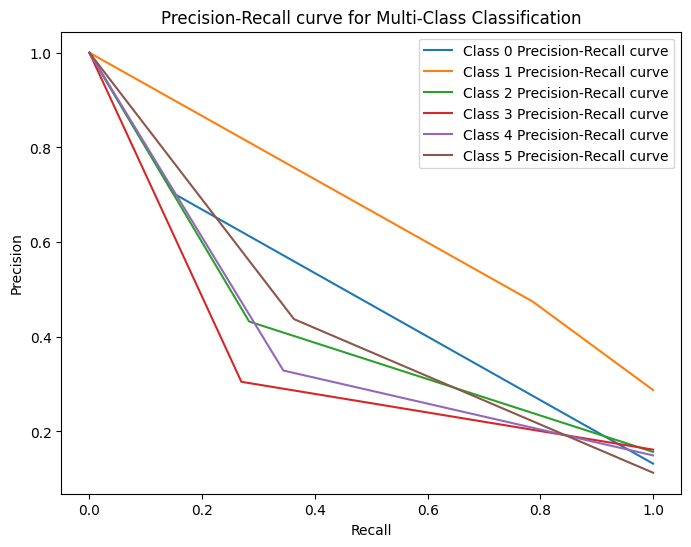

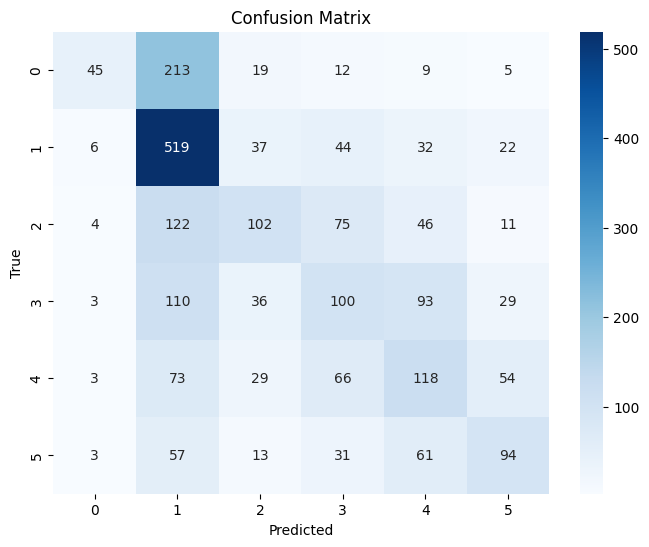

Test Loss: 1.5903
Test Accuracy: 0.4260
F1 Score (Macro): 0.3664
Macro Precision: 0.4468
Macro Recall: 0.3658


In [63]:
train_model(model, train_loader, val_loader, criterion, optimizer, epochs=5)

evaluate_model(model, test_loader, criterion)

#### Naive Bayes Fun

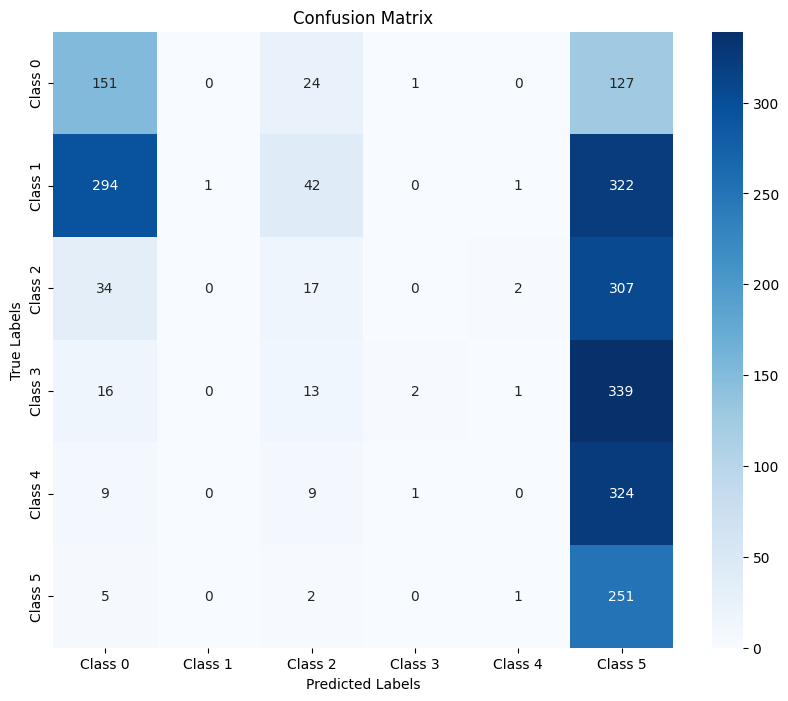

Log Loss on Test Data: 24.2993
F1 Score (Macro): 0.1198
Precision (Macro): 0.3510
Recall (Macro): 0.2536
Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.50      0.37       303
           1       1.00      0.00      0.00       660
           2       0.16      0.05      0.07       360
           3       0.50      0.01      0.01       371
           4       0.00      0.00      0.00       343
           5       0.15      0.97      0.26       259

    accuracy                           0.18      2296
   macro avg       0.35      0.25      0.12      2296
weighted avg       0.45      0.18      0.09      2296



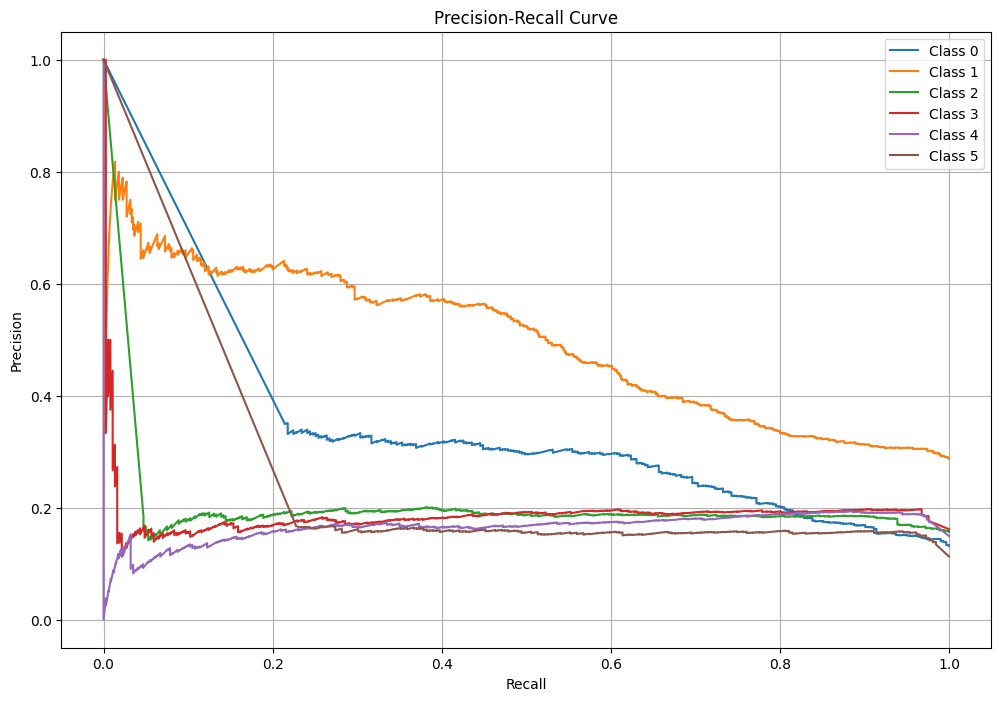

In [44]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_recall_fscore_support, precision_recall_curve, log_loss
import seaborn as sns

# Naive Bayes model
def prepare_features(tensors):
    # Flatten and concatenate all tensors
    concatenated = torch.cat([tensor.view(tensor.size(0), -1) for tensor in tensors], dim=1)
    return concatenated.cpu().numpy()

X_train = prepare_features(train_tensors)
X_val = prepare_features(val_tensors)
X_test = prepare_features(test_tensors)

# Convert labels to numpy
y_train_np = y_train.cpu().numpy()
y_val_np = y_valid.cpu().numpy()
y_test_np = y_test.cpu().numpy()

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train_np)

# Evaluate on test data
test_preds = nb_model.predict(X_test)
conf_matrix = confusion_matrix(y_test_np, test_preds)
# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[f"Class {i}" for i in range(6)], yticklabels=[f"Class {i}" for i in range(6)])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Calculate log loss
probs_test = nb_model.predict_proba(X_test)
test_loss = log_loss(y_test_np, probs_test)
print(f"Log Loss on Test Data: {test_loss:.4f}")


f1 = f1_score(y_test_np, test_preds, average="macro")
precision, recall, fscore, _ = precision_recall_fscore_support(y_test_np, test_preds, average="macro")
print(f"F1 Score (Macro): {f1:.4f}")
print(f"Precision (Macro): {precision:.4f}")
print(f"Recall (Macro): {recall:.4f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test_np, test_preds))

# Precision-recall curves for each class
plt.figure(figsize=(12, 8))
for i in range(6):  # For each class
    y_test_binary = (y_test_np == i).astype(int)
    probs = nb_model.predict_proba(X_test)[:, i]
    prec, rec, _ = precision_recall_curve(y_test_binary, probs)
    plt.plot(rec, prec, label=f"Class {i}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()